# Машинное обучение, ВМК МГУ

# Практическое задание 2. EM-алгоритм

## Общая информация
Дата выдачи: 22.03.2021

Мягкий дедлайн: 11.04.2021 23:59 MSK

Жёсткий дедлайн: 18.04.2021 23:59 MSK

## Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). **Максимальная оценка за работу (без учёта бонусов) — 10 баллов.**

Сдавать задание после указанного жёсткого срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи !!ВАЖНО!!!
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-09-em-Username.ipynb
* Модули preprocessing.py, metrics.py, models.py, содержащие написанный вами код
* **Ссылки на посылки** в Яндекс.Контест для всех функций и классов, которые вы реализовали

Ссылка на Яндекс.Контест: https://contest.yandex.ru/contest/25534

Username — ваша фамилия и имя на латинице именно в таком порядке

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    

In [1]:
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True, grid=True)
plt.rc('grid', c='grey', ls=':')
plt.rc('font', family='serif', size=8)
plt.rc('image', cmap='Greys', interpolation='none')

# Generative model of Labels, Abilities, and Difficulties (GLAD)

В [семинаре 15](https://github.com/esokolov/ml-course-hse/blob/master/2020-spring/seminars/sem15-em.pdf) мы рассмотрели задачу восстановления истинной разметки по меткам от экспертов (которым мы не можем доверять в полной мере, более того, их предсказания могут расходиться).

Рассмотрим следующую вероятностную модель:

$$ p(L, Z | \alpha, \beta) = \prod_{i=1}^{n} \prod_{j=1}^m \sigma(\alpha_j\beta_i)^{[l_{ij}=z_i]}\sigma(-\alpha_j\beta_i)^{1-[l_{ij}=z_i]} p(z_j)$$

где $l_{ij} -$ ответ $j$-го эксперта на задачу $i$, $z_j -$ истинная разметка, $\alpha_j, \beta_i-$ уровень экспертизы и сложность задачи соответственно. Для более подробного описания модели можно прочитать материалы семинара, а также [оригинальную статью](http://papers.nips.cc/paper/3644-whose-vote-should-count-more-optimal-integration-of-labels-from-labelers-of-unknown-expertise.pdf). Априорное распределение положим равномерным: $p(z_i) = 0.5$.

In [2]:
import numpy as np
seed = 0xDEADF00D
np.random.seed(seed)

In [3]:
L = np.load('L.npy')
n, m = L.shape
print(f"Число задач (n_problems): {n}, число экспертов (n_experts): {m}")

Число задач (n_problems): 2000, число экспертов (n_experts): 20


---

**Задание 1. (2 балла)** Реализуйте EM-алгоритм для заданной выше модели. Вы можете воспользоваться предложенными шаблонами или написать свои. 

Обратите внимание, что правдоподобие моделирует не вероятность метки $l_{ij}$ принять значение 1 или 0, а вероятность того, что она равна скрытой переменной $z_i$, т.е. $p(l_{ij} = z_j|z_j, \alpha_j, \beta_i) \neq p(l_{ij} = 1|\alpha_j, \beta_i) $. При этом заранее неизвестно, какая из скрытых переменных соответствует метке 1. Не забывайте, что параметры $\beta_i$ должны быть неотрицательными; для этого оптимизируйте $\log \beta$. На M-шаге можете использовать как один шаг градиентного спуска, так и несколько: разумные результаты у вас должны получаться вне зависимости от числа итераций.

**Подсказки:**

* При работе с вероятностями не забывайте о точности:
 1. Используйте логарифмы вероятностей.
 2. $\log \sigma(a)$ лучше преобразовать в $\log \sigma(a) = -\log(1 + \exp(-a)) = -\mathrm{softplus}(-a) $
 3. Ещё полезные функции: `scipy.special.expit`, `scipy.special.logsumexp`, `np.log1p`
* Для отладки может быть полезно проверить градиенты, возвращаемые функциями `alpha_grad_lb` и `logbeta_grad_lb` с помощью `scipy.optimize.check_grad`.
* Размеры возвращаемых значений, указанные в докстринге функций могут помочь вам понять, что необходимо возвращать
* Почитайте докстринги, в них есть подсказки и ссылки на формулы из семинара

---

In [4]:
def softplus(x):
    '''stable version of log(1 + exp(x))'''
    c = (x > 20) * 1.
    return np.log1p(np.exp(x * (1-c)) * (1-c)) + x * c

<font color=blue>Отличия от шаблонов в сигнатуре написаны докстрингах. Из-за изменений функций код проверки градиента тоже немного изменен, чтобы соответствовать им.</font>

In [5]:
from scipy.special import expit as sigmoid

def posterior(alpha, beta, L):
    """ p(z = 0 | l, \alpha, \beta)
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
    Returns:
        ndarray of shape (n_problems, 1)
    """
    gamma = np.einsum('ij,j', (1 - 2*L), alpha) * beta
    return sigmoid(gamma)[:, None]

In [6]:
def lower_bound(alpha, beta, L, q0):
    """ Lower bound
    Args:
        alpha: ndarray of shape (n_experts),
        beta: ndarray of shape (n_problems),
        L: ndarray of shape (n_problems, n_experts),
        q0: ndarray of shape (n_problems, 1).
    Returns:
        single value, number
    """
    outer = np.einsum('i,j->ij', beta, alpha)
    return (outer * (q0 * (1 - 2*L) + L) - softplus(outer)).sum()

In [7]:
def grad_lb(alpha, beta, L, q0):
    """ Gradients of lower bound wrt alpha
        and logarithm of beta.
    Args:
        alpha: ndarray of shape (n_experts),
        beta: ndarray of shape (n_problems),
        L: ndarray of shape (n_problems, n_experts),
        q0: ndarray of shape (n_problems, 1).
    Returns:
        tuple, 2 ndarrays of shape (n_problems,)
    """
    outer = np.einsum('i,j->ij', beta, alpha)
    common = q0 * (1 - 2*L) + L - sigmoid(outer)
    grad_alpha = np.einsum('ij,i', common, beta)
    grad_logbeta = np.einsum('ij,j', common, alpha) * beta
    return grad_alpha, grad_logbeta

**Подсказка:**
* При проверке alpha значения, выдываемые функцией `check_grad` должны быть не более 0.01. Иначе у вас где-то ошибка
* При проверке logbeta значения, выдываемые функцией `check_grad` должны быть не более 0.05. Иначе у вас где-то ошибка

In [8]:
from scipy.optimize import check_grad
from scipy.special import expit

alpha, logbeta = np.random.randn(m), np.random.randn(n)
beta = np.exp(logbeta)
q = np.ones((2, len(beta))) * 0.5
q0 = q[0, :, None]

check_grad(
    lambda a: lower_bound(a, beta, L, q0),
    lambda a: grad_lb(a, beta, L, q0)[0],
    alpha
)

0.0014108659853362242

In [9]:
check_grad(
    lambda lb: lower_bound(alpha, np.exp(lb), L, q0),
    lambda lb: grad_lb(alpha, np.exp(lb), L, q0)[1],
    logbeta
)

0.01364844776037449

In [10]:
def em(L, n_steps=1000, lr=1e-3):
    alpha, logbeta = np.random.randn(m), np.random.randn(n)
    beta = np.exp(logbeta)
    q0 = np.ones((len(beta), 1)) * 0.5

    for step in range(n_steps):
        q0 = posterior(alpha, beta, L)
        grad_alpha, grad_logbeta = grad_lb(alpha, beta, L, q0)
        alpha += lr * grad_alpha
        logbeta += lr * grad_logbeta
        beta = np.exp(logbeta)
        pass

    return alpha, beta, q0

In [11]:
%%time
alpha, beta, q0 = em(L)

CPU times: user 588 ms, sys: 0 ns, total: 588 ms
Wall time: 586 ms


---

**Задание 2. (1 балл)** Загрузите настоящую разметку. Посчитайте `accuracy` разметки, полученной с помощью обычного голосования по большинству среди экспертов, и сравните его с качеством, полученным с помощью EM-алгоритма.

**Разбалловка:**
* **0.5 балла** -- качество голосования не менее 0.904
* **0.5 балла** -- качестве EM не менее 0.95

**Подсказка:**
* Помните, что алгоритму не важно, какая метка 0, а какая 1, поэтому если получите качество <0.5, то просто поменяйте метки классов (не забудьте также поменять знак у $\alpha$). 

---

In [12]:
y = np.load('y.npy')

acc_vote = ((L.mean(axis=1) > 0.5) == y).mean()
print('Accuracy (majority vote):', acc_vote)

acc_em = ((q0 < 0.5).ravel() == y).mean()
print('Accuracy (EM):', acc_em)

Accuracy (majority vote): 0.904
Accuracy (EM): 0.9555


---

**Задание 3. (0.5 балла)** Попробуйте проинтерпретировать полученные коэфициенты $\alpha$. Есть ли в выборке эксперты, которые намеренно голосуют неверно? Как это можно понять по альфам? Продемонстрируйте, что эксперты действительно чаще голосуют за неверный класс. Отобразите визуализацию зависимости доли врено размеченных экспертом объектов от коэффициента $\alpha$. Прокомментируйте результаты и полученную зависимость.

**Подсказки:**
* Если вы отобразили или хотели отобразить зависимость при помощи обычного plot (график), то посмотрите повнимательнее/подумайте, почему это не очень хорошая визуализация. **Для возможности получения полного балла** правильно будет использовать тип отображения scatter plot.
*  Также **для возможности получения полного балла** вам необходимо проинтерпретировать смысл зависимости для всех групп альф, которые вы увидите (спойлер: их должно быть 3:)

---

<font color=blue>Посмотрим, как связаны коэффициенты $\alpha$ и с точностью экспертов.</font>

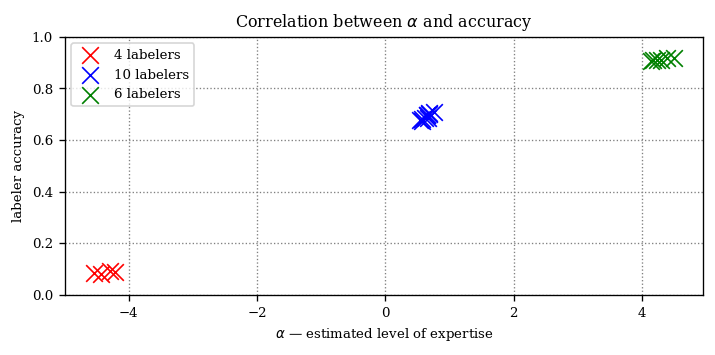

In [17]:
acc_per_labeler = (L == y[:, None]).mean(axis=0)
masks = alpha < -3.5, (-3.5 < alpha) & (alpha < 3.5), alpha > 3.5
colors = ['r', 'b', 'g']
plt.figure(figsize=(6, 3), dpi=120)
for mask, c in zip(masks, colors):
    plt.scatter(alpha[mask], acc_per_labeler[mask], marker='x', s=100,
                lw=1, c=c, label=f'{mask.sum()} labelers', facecolor=None)
plt.xlabel(r'$\alpha$ — estimated level of expertise')
plt.ylabel('labeler accuracy')
plt.ylim(0, 1)
plt.legend()
plt.title(r'Correlation between $\alpha$ and accuracy')
plt.tight_layout()

<font color=blue>Как видим, большее $\alpha$ соответствует большей доле верно размеченных объектов. На графике четко разделяются три группы:</font>
* <font color=blue>Малые ($\alpha\approx -4$, accuracy $\approx 0.1$) — в «красной» группе эксперты преимущественно ставят противоположные метки (возможно, намеренно).</font>
* <font color=blue>Средние ($\alpha \approx 0.6$, accuracy $\approx 0.7$) — в «синей» группе эксперты нередко ошибаются, но стараются делать верную разметку.</font>
* <font color=blue>Большие ($\alpha \approx 4$, accuracy $\approx 0.9$) — в «зеленой» группе эксперты достаточно компетентны, а также не перепутали смысл меток.</font>

<font color=blue>Итак, большее значение $\alpha$ действительно соответствует большей частоте верных меток. При этом наибольший интерес вызывает «красная» группа, в которой эксперты с высокой точностью отличают метки друг от друга, но в итоге ставят противоположные.</font>

**Задание 4. (бонус, 1 балл)**  Как уже было замечено выше, модели не важно, какой класс 1, а какой 0. Скажем, если все эксперты оказались максимально противными и ставят метку с точностью наоборот, то у вас будет полная согласованность между экспертами, при этом невозможно понять правильно они разметили выборку или нет, смотря только на такую разметку. Чтобы избежать этого, можно включать в выборку вопрос с заведомо известным ответом, тогда вы сможете определить, ставит ли эксперт специально неверные метки.

Чтобы обощить данную модель на случай заданий с заведомо известной меткой, достоточно не делать для них E-шаг, а всегда полагать апостериорное распределение вырожденным в истинном классе. Реализуйте данную модель и используйте истинную разметку *для нескольких* задач из обучения. Сравните модифицированный алгоритм с обычным. Проинтерпретируйте полученные результаты.

**Подсказка:**
* Как можно сравнить, что модифицированный алгоритм действительно "лучше" обычного: запускаем обычный и модифицированный много раз (например, 100). Для каждой версии считаем распределение полученных accuracy_score. Если все сделано верно, то в модифицированной версии доля больших значений accuracy должна быть выше, чем низких (это как раз и есть сигнал о перепутывании классов), а в обычной версии -- доли должны быть примерно равны. **Для возможности получения полного балла мы ожидаем от вас какого-то такого или похожего сравнения**

---

In [21]:
def get_known_idx(y, n_per_group=50):
    rng = np.arange(len(y))
    return np.hstack([np.random.choice(rng, size=n_per_group, replace=False,
                      p=(y==i)/(y==i).sum()) for i in range(2)])

def em_with_known_labels(L, known_idx, known_labels,
                         n_steps=1000, lr=1e-3):
    alpha, logbeta = np.random.randn(m), np.random.randn(n)
    beta = np.exp(logbeta)
    q0 = np.ones((len(beta), 1)) * 0.5
    q0[known_idx, 0] = known_labels == 0
    E_idx = np.ones(len(q0), dtype=bool)
    E_idx[known_idx] = False
    
    for step in range(n_steps):
        q0[E_idx] = posterior(alpha, beta[E_idx], L[E_idx])
        grad_alpha, grad_logbeta = grad_lb(alpha, beta, L, q0)
        alpha += lr * grad_alpha
        logbeta += lr * grad_logbeta
        beta = np.exp(logbeta)
        pass

    return alpha, beta, q0

<font color=blue>В версии алгоритма с известными примерами будем считать accuracy только на оставшихся.</font>

In [22]:
from tqdm.notebook import tqdm, trange

acc_unknown, acc_with_known = [], []
for i in trange(100):
    q0 = em(L)[2]
    acc = ((q0 < 0.5).ravel() == y).mean()
    acc_unknown.append(acc)

    known_idx = get_known_idx(y)
    unknown = np.ones(len(y), dtype=bool)
    unknown[known_idx] = False
    q0 = em_with_known_labels(L, known_idx, y[known_idx])[2]
    acc = ((q0[unknown] < 0.5).ravel() == y[unknown]).mean()
    acc_with_known.append(acc)

  0%|          | 0/100 [00:00<?, ?it/s]

In [25]:
print('===~ All labels are unknown ~===')
n_success_unknown = int(np.greater(acc_unknown, 0.9).mean() * 100)
print(f'Accuracy is high in {n_success_unknown}% cases')
print()
print('===~ With some (100) known labels ~===')
n_success_known = int(np.greater(acc_with_known, 0.9).mean() * 100)
print(f'Accuracy is high in {n_success_known}% cases')

===~ All labels are unknown ~===
Accuracy is high in 49% cases

===~ With some (100) known labels ~===
Accuracy is high in 55% cases


<font color=blue>Действительно, если несколько примеров заведомо известны, то классы перепутываются реже, чем без «подсказок».</font>

# Выравнивание слов (Word Alignment)

EM-алгоритм также применяют на практике для настройки параметров модели выравнивания слов, более сложные модификации которой используются в статистическом машинном переводе. Мы не будем подробно обсуждать применение word alignment для перевода и ограничимся следующей целью: пусть у нас есть параллельный корпус из предложений на исходном языке и их переводов на целевой язык (в этом задании используются английский и чешский соответственно). 

Первая задача — определить с помощью этого корпуса, как переводится каждое отдельное слово на целевом языке. Вторая задача — для произвольной пары из предложения и его перевода установить, переводом какого слова в исходном предложении является каждое слово в целевом предложении. Оказывается, у обеих задач существует элегантное и эффективное решение при введении правильной вероятностной модели: в этой части задания вам предстоит его реализовать и оценить результаты работы. Но обо всём по порядку :)

---

Перед тем, как заниматься машинным обучением, давайте разберёмся с данными и метриками в интересующей нас задаче. В ячейке ниже загружается и разархивируется параллельный английско-чешский корпус, в котором есть разметка выравнивания слов. Нетрудно заметить, что формат XML-файла, использованный его авторами, не вполне стандартный: нет готовой команды , которая позволила бы получить список пар предложений вместе с выравниваниями. Это значит, что нужно разобраться с форматом и написать парсер самостоятельно, используя встроенные средства Python, например, модуль [xml](https://docs.python.org/3.7/library/xml.html).

In [3]:
%%bash
wget -q https://lindat.mff.cuni.cz/repository/xmlui/bitstream/handle/11234/1-1804/CzEnAli_1.0.tar.gz -O CzEnAli_1.0.tar.gz
mkdir -p data
tar -xzf CzEnAli_1.0.tar.gz -C data/
head -n 20 data/merged_data/project_syndicate/project_syndicate_bacchetta1.wa

<?xml version="1.0" encoding="utf-8" ?>
<sentences>
<s id="project_syndicate_bacchetta1-s1">
  <english>Are the Dollar 's Days Numbered ?</english>
  <czech>Jsou dny dolaru sečteny ?</czech>
  <sure>1-1 3-3 5-2 6-4 7-5</sure>
  <possible>2-2 4-3</possible>
</s>
<s id="project_syndicate_bacchetta1-s2">
  <english>Philippe Bacchetta and Eric van Wincoop</english>
  <czech>Philippe Bacchetta and Eric van Wincoop</czech>
  <sure>1-1 2-2 3-3 4-4 5-5 6-6</sure>
  <possible></possible>
</s>
<s id="project_syndicate_bacchetta1-s3">
  <english>A year ago , the dollar bestrode the world like a colossus .</english>
  <czech>Ještě před rokem dolar dominoval světu jako imperátor .</czech>
  <sure>10-7 12-8 13-9 2-3 3-2 6-4 7-5 9-6</sure>
  <possible>1-3 11-8 3-1 5-4 8-6</possible>
</s>


**Задание -2. (0.5 балла)** Реализуйте функцию `extract_sentences`, которая принимает на вход путь к файлу с XML-разметкой, используемой в этом датасете, и возвращает список параллельных предложений, а также список из «уверенных» (sure) и «возможных» (possible) пар выравниваний. Отправьте вашу реализацию в Яндекс.Контест, чтобы убедиться в её корректности; в следующей ячейке ноутбука соберите все пары размеченных предложений из датасета в два списка `all_sentences` (список `SentencePair`) и `all_targets` (список LabeledAlignment).

**Подсказка:**
* Возможно у вас не будут проходить тесты, но вы не будете понимать, в чем же дело:) Попробуйте в таком случае заменить & на `&amp;` или 
`&#038;`
https://stackoverflow.com/questions/17423495/how-to-solve-ampersand-conversion-issue-in-xml


---

**Замечание:** 
* **Полностью проходящая все тесты посылка в этом заданиии дает 0.5 балла. За непроходящий хотя бы 1 тест вы получите 0 баллов.**
* Здесь и далее соблюдайте сигнатуры функций и пользуйтесь объявленными в модуле `preprocessing.py` классами для организации данных. Стоит заметить, что предложения уже токенизированы (даже отделена пунктуация), поэтому предобработку текстов совершать не нужно. Обратите внимание на формат хранения выравниваний: нумерация начинается с 1 (в таком виде и нужно сохранять), первым в паре идёт слово из англоязычного предложения.

---
**>>https://contest.yandex.ru/contest/25534/run-report/50302584/<<**

---

In [26]:
import glob
from preprocessing import extract_sentences

all_sentences = []
all_targets = []

for fpath in glob.glob('data/*/*/*.wa'):
    sps, als = extract_sentences(fpath)
    all_sentences += sps
    all_targets += als

---

**Задание -1. (0.5 балла)** Реализуйте функции `get_token_to_index` и `tokenize_sents` из модуля `preprocessing.py`, постройте словари token->index для обоих языков и постройте список из `TokenizedSentencePair` по выборке. Реализации функций также отправьте в Яндекс.Контест.

**Замечание:** 
* **Полностью проходящая все тесты посылка в этом заданиии дает 0.5 балла. За непроходящий хотя бы 1 тест вы получите 0 баллов.**

---
**>>https://contest.yandex.ru/contest/25534/run-report/50319417/<<**

---

In [27]:
from preprocessing import get_token_to_index, tokenize_sents

t_idx_src, t_idx_tgt = get_token_to_index(all_sentences)
tokenized_sentences = tokenize_sents(all_sentences, t_idx_src, t_idx_tgt)

В качестве бейзлайна для этой задачи мы возьмём способ выравнивания слов по коэффициенту Дайса: слово в исходном языке является переводом слова на целевом языке, если они часто встречаются в одних и тех же предложениях и редко встречаются по отдельности. 

Математически это записывается по аналогии с мерой Жаккара: пусть $c(x,y)$ — число параллельных предложений, в которых есть и $x$ (на исходном языке), и $y$ (на целевом языке), а $c(x)$ и $c(y)$ — суммарное количество предложений, в которых встречается слово $x$ и $y$ соответственно. Тогда $\textrm{Dice}(x,y)=\frac{2 \cdot c(x,y)}{c(x) + c(y)}$ — характеристика «похожести» слов $x$ и $y$. Она равна 1, если слова встречаются только в контексте друг друга (не бывает предложений только со словом $x$ без $y$ в переводе и наоборот), равна 0, если слова никогда не встречаются в параллельных предложениях и находится между пороговыми значениями в остальных случаях.

В файле `models.py` описан абстрактный класс `BaseAligner`, наследником которого должны являться все модели в задании, а также приведён пример реализации `DiceAligner` выравнивания слов описанным выше путём. Ниже вы можете увидеть, как применять эту модель.

In [28]:
from models import DiceAligner

baseline = DiceAligner(len(t_idx_src), len(t_idx_tgt), threshold=0.01)
baseline.fit(tokenized_sentences)

---

Чтобы оценить качество модели выравнивания, пользуясь имеющейся разметкой, существует ряд автоматических метрик. Они подразумевают, что в разметке есть два вида выравниваний — «уверенные» (sure) и «возможные» (possible). Обозначим для конкретного предложения первое множество выравниваний $S$, второе — $P$, а предсказанные выравнивания — $A$; причём, в отличие от разметки в файле, $S\subseteq P$. Тогда можно предложить три метрики, используя только операции над этими множествами:

Precision $=\frac{|A\cap P|}{|A|}$. Отражает, какая доля предсказанных нами выравниваний вообще корректна; если мы дадим в качестве ответа все возможные пары слов в предложении, эта метрика сильно просядет.

Recall $=\frac{|A\cap S|}{|S|}$. Эта метрика показывает, какую долю «уверенных» выравниваний мы обнаружили. Если мы попытаемся сделать слишком консервативную модель, которая выдаёт 0 или 1 предсказание на нетривиальных предложениях, полнота получится крайне низкая. 

Alignment Error Rate (AER) $=1-\frac{|A\cap P|+|A\cap S|}{|A|+|S|}$. Метрика является комбинацией двух предыдущих и отслеживает общее качество работы системы, штрафуя оба описанных выше вида нежелаемого поведения модели. 

**Задание 0. (0.5 балла)** Реализуйте функции compute_precision, compute_recall, compute_aer из модуля metrics.py. Оцените качество бейзлайнового метода. Обратите внимание, что нужно использовать микро-усреднение во всех функциях: необходимо просуммировать числитель и знаменатель по всем предложениям и только потом делить.

**Замечание:**
* **Для возможности получения полного балла** ошибка aer должна быть не выше **0.82.** Если получили значение выше -- скорее всего, у вас где-то ошибка
* **Полностью проходящая все тесты посылка в этом заданиии дает 0.5 балла. За непроходящий хотя бы 1 тест вы получите 0 баллов.**

---
**>>https://contest.yandex.ru/contest/25534/run-report/50321494/<<**

---

In [29]:
from metrics import compute_aer

compute_aer(all_targets, baseline.align(tokenized_sentences))

0.8115275584918071

---

Теперь мы можем перейти к базовой вероятностной модели для выравнивания слов. Пусть $S=(s_1,\ldots,s_n)$ исходное предложение, $T=(t_1,\ldots,t_m)$ — его перевод. В роли латентных переменных будут выступать выравнивания $A=(a_1,\ldots,a_m)$ каждого слова в целевом предложении, причём $a_i\in\{1,\ldots,n\}$ (считаем, что каждое слово в $t$ является переводом какого-то слова из $s$). Параметрами модели является матрица условных вероятностей перевода: каждый её элемент $\theta(y|x)=p(y|x)$ отражает вероятность того, что переводом слова $x$ с исходного языка на целевой является слово $y$ (нормировка, соответственно, совершается по словарю целевого языка). Правдоподобие латентных переменных и предложения на целевом языке в этой модели записывается так:

$$
p(A,T|S)=\prod_{i=1}^m p(a_i)p(t_i|a_i,S)=\prod_{i=1}^m \frac{1}{n}\theta(t_i|s_{a_i}).
$$ 

**Задание 1. (2 балла)** Выведите шаги EM-алгоритма для этой модели, а также получите выражение для подсчёта нижней оценки правдоподобия ($\mathcal{L}$ в обозначениях лекции и семинара). **Обратите внимание, что на M-шаге нужно найти аналитический максимум по параметрам.**

**Замечание:**
* _Возможные форматы ответа:_ в ячейке ноутбука, отдельно сданная в энитаск pdf c набранными формулами в LaTex, отдельная сданная в энитаск фотография (или скан) рукописного (и разборчивого) вывода.
* Наличие только ответа оценивается **в 0 баллов**
* Наличие неочевидных переходов без пояснений влияет на **баллы в меньшую сторону**

**Подсказка:**
* Не забывайте об ограничениях по значению на $\theta$, это должно быть тем или иным образом отображено в выводе шагов
* Помните, что у вас в корпусе несколько предложений (положим их число равным $R$ например)
* А также помните, что длины каждой пары (предложение, перевод) различны. Длины предложений $i-$й пары можно обозначать, например, как $n_i$ и $m_i$. 

<font color=blue>Проведем вывод не на синем, а на</font> человеческом, <font color=blue>так как вроде бы синий латех воспринимается тяжко.</font>

Выкладки несложные, но основная задача — не запутаться в трех уровнях индексации. Будем придерживаться следующих обозначений:

> * $l$ — число предложений в корпусе, дла них используем индекс $i\in\overline{1,l}$;
> * $n_i$ — число слов в $i$-м исходном предложении $s^i$, индекс по словам — $j\in\overline{1,n_i}$;
> * $m_i$ — число слов в $i$-м целевом предложении $t^i$, индекс по словам — $k\in\overline{1,m_i}$;
> 
> Например, $s^i_j$ и $t^i_k$ — это $j$-е слово $i$-го предложения на исходном языке и $k$-е слово его перевода соответственно.
> 
> * $a^i_k$ — латентная переменная, т.е. выравнивание $k$-го слова $i$-го целевого предложения ($t^i_k$);
> * $A=[a^1,\dots,a^l]$, $S=[s^1,\dots,s^l]$, $T=[t^1,\dots,t^l]$ — латентные переменные (выравнивания), исходные и целевые предложения по всему корпусу;
> * $\theta_{xy}:= \theta(y\mid x)$, $x\in\mathcal{X}$ — множество слов на исходном языке, $y\in\mathcal{Y}$ — множество слов на целевом языке (понадобится на M-шаге).

Тогда, согласно нашей модели:

$$
p(a^i_k=j, t^i_k \mid s^i)=
p(a^i_k=j)\cdot p(t^i_k\mid a^i_k=j, s^i)=
\frac{\theta(t^i_k\mid s^i_j)}{n_i}.
$$

**E-шаг.** Здесь мы обновляем распределение скрытых переменных $q^*(A)$, полагая его равным апостериорному распределению $p(A\mid T,S)$:

$$
q_{ijk}:=
q^*(a^i_k=j)=
p(a^i_k=j\mid t^i_k, s^i)=
\frac{p(a^i_k=j, t^i_k\mid s^i)}{p(t^i_k\mid s^i)}
= \\ =
\frac{p(a^i_k=j, t^i_k\mid s^i)}
{\sum\limits_{\ddot{\jmath}=1}^{n_i}
p(a^i_k=\ddot{\jmath}, t^i_k\mid s^i)}
=
\frac{\frac{1}{n_i}\cdot\theta(t^i_k\mid s^i_j)}
{\sum\limits_{\ddot{\jmath}=1}^{n_i}
\frac{1}{n_i}\cdot\theta(t^i_k\mid s^i_{\ddot{\jmath}})}
= \\ =
\frac{\theta(t^i_k\mid s^i_j)}
{\sum\limits_{\ddot{\jmath}=1}^{n_i}
\theta(t^i_k\mid s^i_{\ddot{\jmath}})}.
$$

**Нижняя оценка логарифма полного правдоподобия $\mathcal{L}$.** 

$$
\mathcal{L}=\int q^*(A)\cdot\log \frac{p(T, A)}{q^*(A)}
=\\=
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}\cdot\log
\frac{p(a^i_k=j, t_k\mid s^i)}{q_{ijk}}
=\\=
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}\cdot\log
\frac{\theta(t^i_k\mid s^i_k)}{n_i\cdot q_{ijk}}.
$$

**M-шаг**. Теперь мы хотим обновить значения переменных $\theta(y\mid x)=\theta_{xy}$, максимизируя нижнюю оценку логарифма правдоподобия — $\mathcal{L}$.

Отбросим все лишнее:
$$
\mathcal{L}=
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}\cdot\log
\frac{\theta(t^i_k\mid s^i_k)}{n_i\cdot q_{ijk}}
\ \rightarrow\ \max_{\theta} \\
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}\cdot\log {\theta(t^i_k\mid s^i_k)}
\ \rightarrow\ \max_{\theta}
$$

У нас задача максимизации с ограничениями,
$$
\forall x\in\mathcal{X}\quad \sum\limits_{y\in\mathcal{Y}} \theta_{xy}=1,
$$
поэтому будем дифференцировать лагранжиан $\mathfrak{L}$ со множителями $\lambda_x$ для каждого равенства:

$$
\mathfrak{L}=
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}\cdot\log {\theta(t^i_k\mid s^i_k)}
-
\sum\limits_{x\in\mathcal{X}}
\lambda_x\cdot
\left(\sum\limits_{y\in\mathcal{Y}} \theta_{xy}-1\right),
$$

Продифференцируем по $\theta_{xy}$:
$$
\frac{\partial\mathfrak{L}}{\partial\theta_{xy}}
=
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}\cdot
\frac{\partial}{\partial\theta_{xy}}
\log {\theta(t^i_k\mid s^i_k)}
-
\frac{\partial}{\partial\theta_{xy}}
\sum\limits_{x\in\mathcal{X}}
\lambda_x\cdot
\left(\sum\limits_{y\in\mathcal{Y}} \theta_{xy}-1\right)
= \\ =
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}\cdot
\frac{1}{\theta_{xy}}\cdot[s^i_j=x]\cdot[t^i_k=y]-\lambda_x.
$$

Приравнивая производную нулю, выражаем $\theta_{xy}$:
$$
\theta_{xy}=\frac{1}{\lambda_{x}}
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}\cdot
[s^i_j=x]\cdot[t^i_k=y],
$$

суммируем по всем $y\in\mathcal{Y}$:

$$
\sum\limits_{y\in\mathcal{Y}} \theta_{xy}=1
=\\=
\sum\limits_{y\in\mathcal{Y}}
\frac{1}{\lambda_{x}}
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}\cdot
[s^i_j=x]\cdot[t^i_k=y]
=\\=
\frac{1}{\lambda_{x}}
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}\cdot
[s^i_j=x]\cdot
\underbrace{\sum\limits_{y\in\mathcal{Y}}[t^i_k=y]}_{1}.
$$

Можем выразить множители Лагранжа:
$$
\lambda_x=
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}
[s^i_j=x].
$$

Осталось подставить в подставить в выражение для $\theta_{xy}$:
$$
\theta_{xy}=\frac
{\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}\cdot
[s^i_j=x]\cdot[t^i_k=y]}
{\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}
[s^i_j=x]}.
$$

Почему на полученных значениях действительно достигается максимум? Потому что $\theta_{xy}$ входят в $\mathcal{L}$ только через логарифм, т.е. вогнутую функцию, а все наложенные ограничения — линейные. Таким образом, выполняется условие Слейтера (с заменой минимума на максимум и выпуклости на вогнутость).

---

**Задание 2. (2 балла)** Реализуйте все методы класса `WordAligner` в соответствии с полученными вами формулами. Протестируйте вашу реализацию через Яндекс.Контест, а здесь обучите модель и посчитайте её AER на истинной разметке. Чтобы предсказать выравнивание для пары предложений в этой модели, следует выбирать в соответствие для слова в целевом предложении с индексом $i$ позицию, соответствующую максимуму апостериорного распределения $p(a_i|T,S)$.

**Замечание:** 
* **Полностью проходящая все тесты посылка в этом заданиии дает 1 балл. За хотя бы 1 непройденный тест вы можете получить за это задание максимум 1 балл**
* **Для возможности получения полного балла** ошибка aer должна быть не выше **0.6.** Если получили значение выше -- скорее всего, у вас где-то ошибка

---
**>>https://contest.yandex.ru/contest/25534/run-report/50456811/<<**

---

<font color=blue>Понадобилось много попыток, чтобы понять, что numpy не накапливает значения в дублирующихся индексах...</font>

In [30]:
from models import WordAligner

word_aligner = WordAligner(len(t_idx_src), len(t_idx_tgt), 20)
word_aligner.fit(tokenized_sentences)
compute_aer(all_targets, word_aligner.align(tokenized_sentences))

0.5802839095012662

Заметим, что таблицу вероятностей перевода можно использовать и саму по себе для построения словарей. Пример работы показан ниже: метод хоть и работает, но мягко говоря, неидально — слишком мало данных.

In [31]:
idx_token_tgt = {index:token for token, index in t_idx_tgt.items()}

In [32]:
[idx_token_tgt[i] for i in word_aligner.translation_probs[t_idx_src['Mr']].argsort()[-3:]]

['Pan', 'řekl', 'pan']

In [33]:
[idx_token_tgt[i] for i in word_aligner.translation_probs[t_idx_src['Mrs']].argsort()[-3:]]

['-', 'Mannová', 'paní']

In [34]:
[idx_token_tgt[i] for i in word_aligner.translation_probs[t_idx_src['water']].argsort()[-3:]]

['z', 'pro', 'vody']

In [35]:
[idx_token_tgt[i] for i in word_aligner.translation_probs[t_idx_src['depended']].argsort()[-3:]]

['koni', 'konec', 'S']

In [36]:
[idx_token_tgt[i] for i in word_aligner.translation_probs[t_idx_src['on']].argsort()[-3:]]

['.', 'se', 'na']

---

**Задание 3. (0.5 балла)** Мы смогли получить матрицу условных вероятностей перевода исходного языка в целевой. Можно ли, пользуясь этой матрицей и ещё какими-то статистиками по параллельному корпусу, получить вероятности перевода целевого языка в исходный?

* Объясните словами принцип работы вашего метода и реализуйте его.
* Также приведите ниже пример его работы, показав пару удачных переводов.

**Подсказка:** какие формулы из теории вероятностей вы знаете? :)

---

<font color=blue>...формула Байеса? Выражаем
    $$p(x\mid y)=\frac{p(y|x)\cdot p(x)}{p(y)},$$
а априорные $p(x)$ и $p(y)$ оценим как частоты слов относительно всего корпуса (по своим языкам, разумеется).</font>

In [37]:
priors_src, priors_tgt = np.zeros(len(t_idx_src)), np.zeros(len(t_idx_tgt))

for pair in tokenized_sentences:
    np.add.at(priors_src, pair.source_tokens, 1)
    np.add.at(priors_tgt, pair.target_tokens, 1)

priors_src /= priors_src.sum()
priors_tgt /= priors_tgt.sum()

reverse_translation = word_aligner.translation_probs.T * priors_src
reverse_translation /= priors_tgt[:, None]

idx_token_src = {index: token for token, index in t_idx_src.items()}

In [38]:
def cz2eng(czech_word, n=3):
    top_n = reverse_translation[t_idx_tgt[czech_word]].argsort()[-n:][::-1]
    return [idx_token_src[i] for i in top_n]

<font color=blue>Функция возвращает наиболее подходящие переводы в порядке <u>убывания</u> уверенности.</font>

In [39]:
cz2eng('plakala')

['cry', 'recalls', 'anxious']

In [40]:
cz2eng('život')

['life', 'lives', 'ups']

In [41]:
cz2eng('bolest')

['pain', 'console', 'crushing']

In [42]:
cz2eng('vánoční')

['Christmas', 'song', 'stocking']

---

**Задание 4. (0.5 балла)** Визуализируйте полученные выравнивания для нескольких предложений в виде heatmap: по одной из осей располагаются токены исходного текста, по другой — токены его перевода, на пересечении позиций $i$ и $j$ — 0 либо 1 в зависимости от того, является ли в обученной модели $a_i$ равным $j$. Проинтерпретируйте их.

Постройте аналогичный график, но без дискретизации, а визуализируя напрямую апостериорное распределение. Можете ли вы найти ситуации, в которых модель не уверена, переводом какого слова является слово $i$?

**Подсказка:**
* Старайтесь не брать слишком короткие предложения

---

In [45]:
alignments = word_aligner.align(tokenized_sentences)
posteriors = word_aligner._e_step(tokenized_sentences)

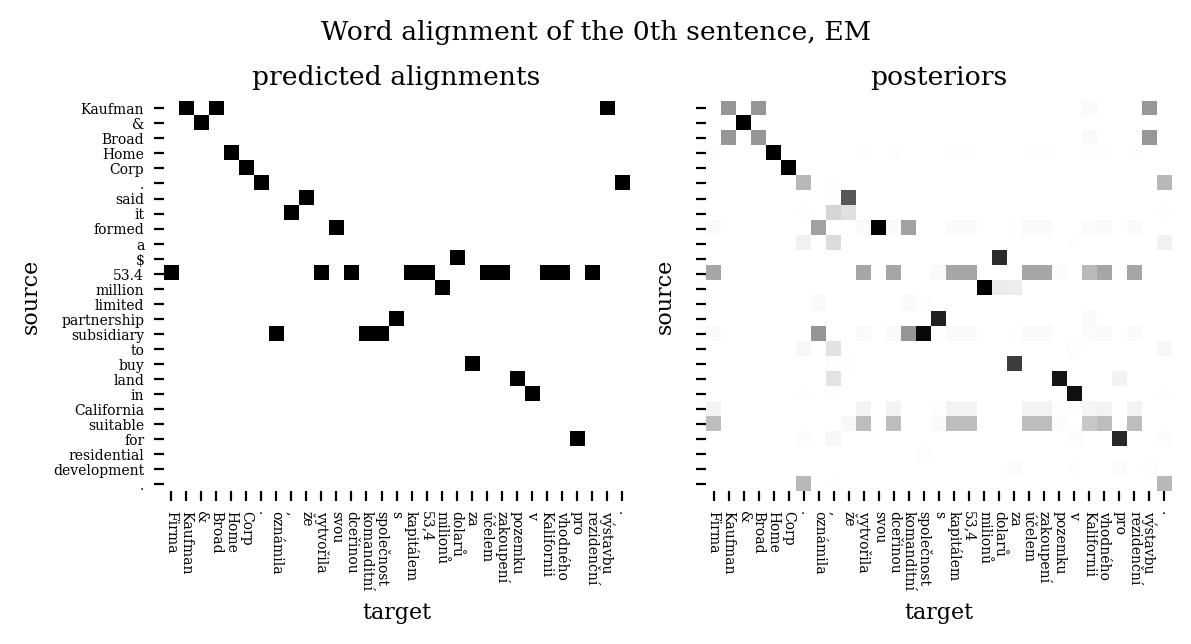

In [46]:
idx = 0
src, tgt = all_sentences[idx].source, all_sentences[idx].target
al_map = np.zeros((len(src), len(tgt)), dtype=bool)
als = np.array(alignments[idx]).T - 1
al_map[als[0], als[1]] = 1

plt.figure(dpi=200)
names = ['predicted alignments', 'posteriors']
vmaps = [al_map, posteriors[idx]]
for i, (vmap, name) in enumerate(zip(vmaps, names), 1):
    plt.subplot(1, 2, i)
    plt.title(name)
    plt.imshow(vmap, aspect='equal')
    plt.xlabel('target'), plt.ylabel('source')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.grid([])
    if i == 1:
        plt.yticks(ticks=np.arange(len(src)), labels=src, fontsize=5)
    else:
        plt.yticks(ticks=np.arange(len(src)), labels=[])
    plt.xticks(ticks=np.arange(len(tgt)), labels=tgt, rotation=-90, fontsize=5)
plt.suptitle(f'Word alignment of the {idx}th sentence, EM', y=0.82)
plt.tight_layout()

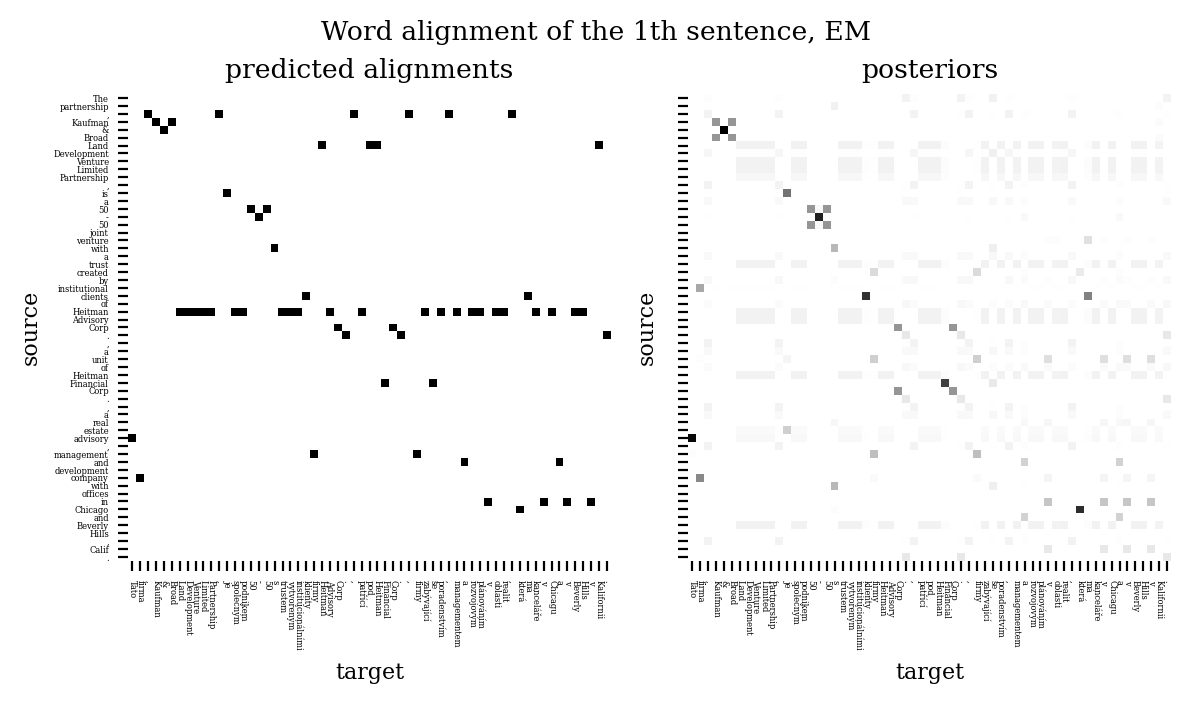

In [47]:
idx = 1
src, tgt = all_sentences[idx].source, all_sentences[idx].target
al_map = np.zeros((len(src), len(tgt)), dtype=bool)
als = np.array(alignments[idx]).T - 1
al_map[als[0], als[1]] = 1

plt.figure(dpi=200)
names = ['predicted alignments', 'posteriors']
vmaps = [al_map, posteriors[idx]]
for i, (vmap, name) in enumerate(zip(vmaps, names), 1):
    plt.subplot(1, 2, i)
    plt.title(name)
    plt.imshow(vmap, aspect='equal')
    plt.xlabel('target'), plt.ylabel('source')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.grid([])
    if i == 1:
        plt.yticks(ticks=np.arange(len(src)), labels=src, fontsize=3)
    else:
        plt.yticks(ticks=np.arange(len(src)), labels=[])
    plt.xticks(ticks=np.arange(len(tgt)), labels=tgt, rotation=-90, fontsize=3)
plt.suptitle(f'Word alignment of the {idx}th sentence, EM', y=0.87)
plt.tight_layout()

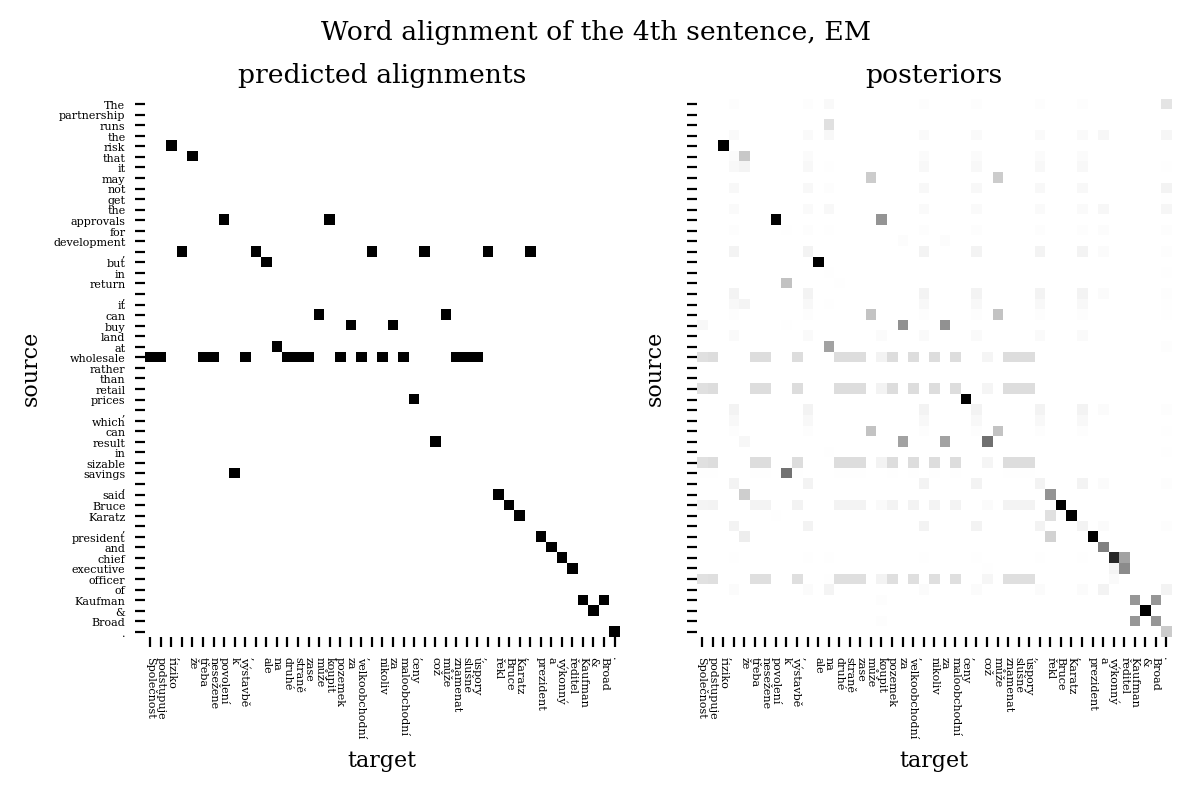

In [48]:
idx = 4
src, tgt = all_sentences[idx].source, all_sentences[idx].target
al_map = np.zeros((len(src), len(tgt)), dtype=bool)
als = np.array(alignments[idx]).T - 1
al_map[als[0], als[1]] = 1

plt.figure(dpi=200)
names = ['predicted alignments', 'posteriors']
vmaps = [al_map, posteriors[idx]]
for i, (vmap, name) in enumerate(zip(vmaps, names), 1):
    plt.subplot(1, 2, i)
    plt.title(name)
    plt.imshow(vmap, aspect='equal')
    plt.xlabel('target'), plt.ylabel('source')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.grid([])
    if i == 1:
        plt.yticks(ticks=np.arange(len(src)), labels=src, fontsize=4)
    else:
        plt.yticks(ticks=np.arange(len(src)), labels=[])
    plt.xticks(ticks=np.arange(len(tgt)), labels=tgt, rotation=-90, fontsize=4)
plt.suptitle(f'Word alignment of the {idx}th sentence, EM', y=0.95)
plt.tight_layout()

<font color=blue>Основная особенность, видная на графиках — модель выстравивает выравнивание слов примерно согласно их расположению (т.е. на heatmap'е выделена диагональ). Также обнаруживается, что у некоторых слов целевого словаря совпадает распределение апостериорных вероятностей, и в максимум в итоге попадает довольно редкое слово. Помимо этого, токены, в которых модель стабильно не уверена — запятые.</font>

## Бонусная часть

Заметим, что при задании модели мы сделали довольно сильное предположение о том, что вероятности выбора слова для выравнивания никак не зависят от позиции слова в целевом предложении. Можно сделать эти вероятности настраиваемыми параметрами, получив прямоугольную матрицу $\phi_{m,n}(j|i)=p(a_i=j|m,n)$ для каждой пары длин предложений $m,n$: по-прежнему мы получаем распределение над индексами в исходном предложении. Тогда модель приобретает вид
$$
p(A,T|S)=\prod_{i=1}^m p(a_i|m,n)p(t_i| a_i, S)=\prod_{i=1}^m \phi_{m,n}(a_i|i)\theta(t_i|s_{a_i}).
$$

**Задание 5. (бонус, 1.5 балла)** Выведите шаги EM-алгоритма для этой модели, а также получите выражение для подсчёта нижней оценки правдоподобия.

**Замечание:**
* _Возможные форматы ответа:_ в ячейке ноутбука, отдельно сданная в энитаск pdf c набранными формулами в LaTex, отдельная сданная в энитаск фотография (или скан) рукописного (и разборчивого) вывода.
* Наличие только ответа оценивается **в 0 баллов**
* Наличие неочевидных переходов без пояснений влияет на **баллы в меньшую сторону**

---

Сохраним обозначения с вывода для `WordAligner`, но добавим новое для  $\phi$:

> $\phi^{n_i m_i}_{jk} := \phi_{m_i,n_i}(j\mid k)$ — это проще согласуется с размером и индексацией;

Отличие от прошлого вывода — замена $\frac{1}{n_i}$ на набор $\phi^{n_i m_i}_{jk}$. Таким образом, модель приобретает вид

$$
p(a^i_k=j, t^i_k \mid s^i)=
p(a^i_k=j\mid m_i, n_i)\cdot p(t^i_k\mid a^i_k=j, s^i)=
\phi^{n_i m_i}_{jk}\cdot\theta(t^i_k\mid s^i_j).
$$

**E-шаг**. Здесь пока все хорошо, просто подменяем:

$$
q_{ijk}:=
q^*(a^i_k=j)=
p(a^i_k=j\mid t^i_k, s^i)=
\frac{p(a^i_k=j, t^i_k\mid s^i)}{p(t^i_k\mid s^i)}
= \\ =
\frac{p(a^i_k=j, t^i_k\mid s^i)}
{\sum\limits_{\ddot{\jmath}=1}^{n_i}
p(a^i_k=\ddot{\jmath}, t^i_k\mid s^i)}
=
\frac
{\phi^{n_i m_i}_{jk}\cdot\theta(t^i_k\mid s^i_j)}
{\sum\limits_{\ddot{\jmath}=1}^{n_i}
\phi^{n_i m_i}_{{\ddot{\jmath}}k}\cdot\theta(t^i_k\mid s^i_{\ddot{\jmath}})
}.
$$

**Нижняя оценка логарифма полного правдоподобия $\mathcal{L}$.** Здесь пока тоже без сюрпризов!

$$
\mathcal{L}=\int q^*(A)\cdot\log \frac{p(T, A)}{q^*(A)}
=\\=
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}\cdot\log
\frac{p(a^i_k=j, t_k\mid s^i)}{q_{ijk}}
=\\=
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}\cdot\log
\frac{\phi^{n_i m_i}_{jk}\cdot\theta(t^i_k\mid s^i_j)}{q_{ijk}}.
$$

**M-шаг**. А вот сейчас начнется...

Во-первых, заметим, что логарифм факторизует $\mathcal{L}$ на отдельные компоненты с $\theta$ и $\phi$. Причем часть с $\theta$ полностью совпадает с предыдущей моделью, поэтому сразу выпишем значения для аналитического максимума:

$$
\theta_{xy}=\frac
{\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}\cdot
[s^i_j=x]\cdot[t^i_k=y]}
{\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}
[s^i_j=x]}.
$$

Теперь разберемся с $\phi$. Мы максимизируем 
$$
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}\log {\phi^{n_i m_i}_{jk}} \ \rightarrow \ \max_{\phi},
$$

причем на $\phi$ имеются ограничения — нормировка вероятностей:
$$
\forall i\in\overline{1,l}, \forall k\in \overline{1,m_i} \quad
\sum\limits_{j=1}^{n_i} \phi^{n_i m_i}_{jk} =1.
$$

Записываем лагранжиан $\mathfrak{L}$:
$$
\mathfrak{L}=
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}\log {\phi^{n_i m_i}_{jk}} -
\sum\limits_{i=1}^{l}
\sum\limits_{k=1}^{m_i}
\lambda_{ik}
\sum\limits_{j=1}^{n_i}\left(\phi^{n_i m_i}_{jk} -1\right),
$$

дифференцируем по $\phi^{n_a m_a}_{bc}$ (т.е. $i,j,k$ соответствуют $a,b,c$):
$$
0=\frac{\partial{\mathfrak{L}}}{\partial{\phi^{n_a m_a}_{bc}}}=
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}\frac{1}{\phi^{n_i m_i}_{jk}}
[n_i,m_i,j,k=n_a,m_a,b,c]
-
\sum\limits_{i=1}^{l}
\sum\limits_{k=1}^{m_i}
\lambda_{ik}[n_i,m_i,k=n_a,m_a,c],
$$

где равенство внутри индикаторов означает проверку того, каждый элемент левой части равен соответствующему элементу правой. Выражаем $\phi^{n_a m_a}_{bc}$:

$$
\phi^{n_a m_a}_{bc}=
\frac
{
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}
[n_i,m_i,j,k=n_a,m_a,b,c]
}
{
\sum\limits_{i=1}^{l}
\sum\limits_{k=1}^{m_i}
\lambda_{ik}[n_i,m_i,k=n_a,m_a,c]
}.
$$

Суммируем обе части равенства по $b\in\overline{1,n_a}$ и учитываем ограничения:
$$
\sum\limits_{b=1}^{n_a}
\phi^{n_a m_a}_{bc}
=1
= \\ =
\frac
{
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}
[n_i,m_i,j,k=n_a,m_a,b,c]
}
{
\sum\limits_{i=1}^{l}
\sum\limits_{k=1}^{m_i}
\lambda_{ik}[n_i,m_i,k=n_a,m_a,c]
}
= \\ =
\frac
{
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}
\sum\limits_{b=1}^{n_a}
[n_i,m_i,j,k=n_a,m_a,b,c]
}
{
\sum\limits_{i=1}^{l}
\sum\limits_{k=1}^{m_i}
\lambda_{ik}[n_i,m_i,k=n_a,m_a,c]
}
= \\ =
\frac
{
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}
[n_i,m_i,k=n_a,m_a,c]
}
{
\sum\limits_{i=1}^{l}
\sum\limits_{k=1}^{m_i}
\lambda_{ik}[n_i,m_i,k=n_a,m_a,c]
}
\ \implies \\
\sum\limits_{i=1}^{l}
\sum\limits_{k=1}^{m_i}
\lambda_{ik}[n_i,m_i,k=n_a,m_a,c]
=
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}
[n_i,m_i,k=n_a,m_a,c]
$$

Ой, а это же как раз знаменатель, который нам нужен в ранее полученном выражении для $\phi^{n_a m_a}_{bc}$. Подставляем и получаем искомые значения:

$$
\phi^{n_a m_a}_{bc}=
\frac
{
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}
[n_i,m_i,j,k=n_a,m_a,b,c]
}
{
\sum\limits_{i=1}^{l}
\sum\limits_{j=1}^{n_i}
\sum\limits_{k=1}^{m_i}
q_{ijk}
[n_i,m_i,k=n_a,m_a,c]
}.
$$

---

**Задание 6. (бонус, 1.5 балла)** Реализуйте все методы класса `WordPositionAligner`, протестируйте их корректность через Яндекс.Контест. Обучите модель, оцените её качество на истинной разметке и сравните его с качеством предыдущей более простой модели. Проиллюстрируйте влияние стартовых параметров на результат, проинициализировав эту модель параметрами модели из задания 2 (важно, чтобы суммарное число эпох обучения в обоих сценариях оставалось тем же).

**Замечание:** 
* **Полностью проходящая все тесты посылка в этом заданиии дает 0.75 балла. За хотя бы 1 непройденный тест вы можете получить за это задание максимум 0.75 балла**

---
**>>https://contest.yandex.ru/contest/25534/run-report/50492511/<<**

---

In [49]:
from models import WordPositionAligner

wp_aligner = WordPositionAligner(len(t_idx_src), len(t_idx_tgt), 20)
wp_aligner.fit(tokenized_sentences)
compute_aer(all_targets, wp_aligner.align(tokenized_sentences))

0.5973212319718155

<font color=blue>Получается, усложненная модель сработала хуже на том же числе эпох (20). Попробуем теперь обучить `WordAligner` на 10 эпохах, зафиксировать качество, инициализировать обученными параметрами `WordPositionAligner` и доучить последнюю модель еще на 10 эпохах.</font>

In [52]:
word_aligner = WordAligner(len(t_idx_src), len(t_idx_tgt), 10)
word_aligner.fit(tokenized_sentences)
aer_10 = compute_aer(all_targets, word_aligner.align(tokenized_sentences))
print(f'AER after 10 epochs of learning WA: {aer_10}')

wp_aligner = WordPositionAligner(len(t_idx_src), len(t_idx_tgt), 10)
wp_aligner.translation_probs = word_aligner.translation_probs
wp_aligner.fit(tokenized_sentences)
aer_20 = compute_aer(all_targets, wp_aligner.align(tokenized_sentences))
print(f'AER after another 10 epochs, initialized with WA, learning WPA: {aer_20}')

AER after 10 epochs of learning WA: 0.5828436364637235
AER after another 10 epochs, initialized with WA, learning WPA: 0.562407106682814


<font color=blue>Простая модель выравнивания, обученная на 10 эпохах (AER = 0.583), работает лучше сложной на, обученной 20 (AER = 0.597), но, если мы используем хак с инициализацией сложной модели, то получаем заметное улучшение (AER=0.562).</font>

---

**Задание 7. (бонус, 1 балл)** В предыдущих пунктах мы никак не заостряли внимание на предобработке текстов, что может негативно влиять на результаты обученной модели. Например, сейчас метод выравнивания учитывает регистр, а слова на чешском языке вдобавок обладают богатой морфологией и большим количеством диакритических знаков. Если сократить количество параметров модели (различных слов), можно ускорить обучение и добиться лучших результатов, потому что статистики по словам будут считаться по большему числу параллельных предложений.

Примените к исходным данным [Unicode-нормализацию](https://en.wikipedia.org/wiki/Unicode_equivalence#Normalization), приведите их к нижнему регистру и обучите модель выравнивания заново. Сравните качество и скорость обучения с предыдущими результатами и сделайте выводы. Если вы найдете в данных ещё какие-то проблемы, которые можно исправить более грамотной предобработкой, также продемонстрируйте, как их решение влияет на качество.

**Важно:** здесь и далее в процессе обработки данных у вас может получаться, что из тестовых данных будут удалены предложения из-за отсутствия слов в словаре. Если такое всё же произошло, для корректности сравнения считайте AER вашей модели на удалённых предложениях равным 1.

---

In [ ]:
# (੭•̀ω•́)੭̸*✩⁺˚

---

**Задание 8. (бонус, до 3 баллов)** 

Улучшите качество получившейся системы настолько, насколько сможете. За каждые 5 процентов, на которые AER на тех же данных получается меньше, чем минимум ошибки всех предыдущих моделей, вы получите по 1 бонусному баллу.

Ниже приведены несколько идей, которые могут помочь вам повысить 

* Модифицировать модель: как вы можете понять, недостатком второго реализованного вами подхода является избыточное число параметров из-за необходимости подерживать отдельную матрицу для каждой различной пары длин предложений в корпусе. В статье https://www.aclweb.org/anthology/N13-1073.pdf приведён способ снижения числа параметров, задающих априорное распределение позиций выравнивания, который позволяет в десять раз быстрее обучать модель и получать лучшее качество.
* Агрегация по двум направлениям: в статье https://www.aclweb.org/anthology/J03-1002/ утверждается, что асимметричность выравниваний вредит качеству, потому что из-за выбранной модели одному слову в целевом предложении не может соответствовать два слова в исходном предложении. Для решения этой проблемы (и улучшения метрик, разумеется) авторы предлагают несколько алгоритмов, которые можно попробовать применить в этом задании.
* Использовать больше обучающих данных. В корпусе, которым мы пользуемся, только пара тысяч предложений, чего может не хватать для по-настоящему хорошей модели выравнивания. Разумеется, неразмеченных параллельных английско-чешских корпусов гораздо больше, поэтому можно воспользоваться ими. Хорошая точка для старта — данные с соревнования по машинному переводу  [воркшопа WMT](http://www.statmt.org/wmt20/translation-task.html).
* В языках часто существуют слова наподобие артиклей или предлогов, которым не соответствует ни одно слово в переводе. Все рассмотренные в рамках задания модели это не учитывают, возможно, добавление возможности перевода в «нулевой» токен улучшит качество модели (при тестировании такие выравнивания имеет смысл выбрасывать)

In [ ]:
# ┐_(ツ)_┌━☆ﾟ.*･｡ﾟ

### Картинка для поддержки ваших чувств по этому заданию

![](https://a.d-cd.net/RAAAAgCnO-A-960.jpg)